## Análise Exploratória de Dados

A exploração de dados (*data exploration*) busca encontrar algo que nem sempre você sabe de fato o que é. 
A Análise Exploratória de Dados (AED) é uma metodologia (ou mesmo filosofia) que provê ferramentas conceituais e 
computacionais (principalmente gráficas) para a descoberta de padrões que levem posteriormente ao desenvolvimento e refinamento de de hipóteses (Nist, 2017; Behrens, 1997).

A AED é útil para (Seltman, 2015):
* Detecção de erros
* Checagem de premissas
* Determinação de relações entre as variáveis
* Avaliar grosseiramente as possíveis relações entre variáveis de entrada e de saída
* Seleção preliminar de modelos apropriados

O pai da AED foi John Tukey que deu origem aos conceitos no livro Exploratory Data Analysis (Tukey, 1977).
*Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone -- as the first step (Tukey, 1977)*


In [33]:
# No Python, os módulos necessários para as análises devem ser incluídos no começo do arquivo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

%matplotlib inline
plt.xkcd()

In [34]:
# Vamos trabalhar com os dados de 2014 a 2016 do Orçamento do Governo do Estado de Alagoas
# Os dados estão disponíveis no site http://orcamento.dados.al.gov.br/ no formato CSV
# A biblioteca Pandas transforma os CSV em DataFrames, um tipo de dado semelhante ao que vemos em CSV ou Excel

ano2016 = pd.read_csv('./OrcamentoGoverno/Estado/orcamento_estado_2016.csv')
ano2015 = pd.read_csv('./OrcamentoGoverno/Estado/orcamento_estado_2015.csv')
ano2014 = pd.read_csv('./OrcamentoGoverno/Estado/orcamento_estado_2014.csv')

In [35]:
# Para facilitar o trabalho, os múltiplos CSVs serão agregados em um único DataFrame
orcamento = pd.concat([ano2016, ano2015, ano2014])

# Mostrando apenas os 5 primeiros dados do DataFrame
orcamento.head()

,ano,mes,vl_inicial,vl_empenhado,vl_atualizado,vl_liquidado,vl_pago
0,2016,1,7.016564e+08,3.487138e+08,7.016564e+08,3.242502e+08,2.858938e+08
1,2016,2,7.016564e+08,4.624372e+08,7.013262e+08,4.432607e+08,4.450468e+08
2,2016,3,7.016564e+08,4.452634e+08,7.013890e+08,4.380316e+08,4.697037e+08
3,2016,4,6.314189e+09,2.543477e+09,7.615038e+09,1.374217e+09,1.344115e+09
4,2016,5,0.000000e+00,6.835374e+08,-1.194525e+08,7.230665e+08,7.264696e+08


Percebemos inicialmente que os dados não estão organizados por data, uma vez que ano e mês estão em colunas separadas.

A primeira "limpeza" de dados que faremos será transformar os dados numéricos de ano e mês em um único dado de *data* que é algo que podemos ordenar e trabalhar de forma melhor que dados numéricos puros.

In [36]:
# Transformando ano e mês em uma coluna de data 

# criando uma lista vazia
meses = []

# iteramos em cada linha do DataFrame transformando o dado usando o módulo date
for item, linha  in orcamento.iterrows():
    meses.append(date(int(linha['ano']), int(linha['mes']), 1))

# Adicionamos o dado como uma Series (formato de coluna de um DataFrame) cujo nome será "data"
orcamento['data'] = pd.Series(meses).values

# Mostrando apenas os 5 primeiros dados do DataFrame
orcamento.head()

,ano,mes,vl_inicial,vl_empenhado,vl_atualizado,vl_liquidado,vl_pago,data
0,2016,1,7.016564e+08,3.487138e+08,7.016564e+08,3.242502e+08,2.858938e+08,2016-01-01
1,2016,2,7.016564e+08,4.624372e+08,7.013262e+08,4.432607e+08,4.450468e+08,2016-02-01
2,2016,3,7.016564e+08,4.452634e+08,7.013890e+08,4.380316e+08,4.697037e+08,2016-03-01
3,2016,4,6.314189e+09,2.543477e+09,7.615038e+09,1.374217e+09,1.344115e+09,2016-04-01
4,2016,5,0.000000e+00,6.835374e+08,-1.194525e+08,7.230665e+08,7.264696e+08,2016-05-01


In [28]:
# Remove dados de ano e mês que não serão mais utilizados
orcamento.drop(['ano', 'mes'], inplace=True, axis=1)

# Mostrando apenas os 5 primeiros dados do DataFrame
orcamento.head()

,vl_inicial,vl_empenhado,vl_atualizado,vl_liquidado,vl_pago,data
0,7.016564e+08,3.487138e+08,7.016564e+08,3.242502e+08,2.858938e+08,2016-01-01
1,7.016564e+08,4.624372e+08,7.013262e+08,4.432607e+08,4.450468e+08,2016-02-01
2,7.016564e+08,4.452634e+08,7.013890e+08,4.380316e+08,4.697037e+08,2016-03-01
3,6.314189e+09,2.543477e+09,7.615038e+09,1.374217e+09,1.344115e+09,2016-04-01
4,0.000000e+00,6.835374e+08,-1.194525e+08,7.230665e+08,7.264696e+08,2016-05-01


Os nomes das colunas podem estar apresentados de forma que não torna fácil a sua interpretação. Caso seja necessário, é possível trocar os nomes deixando-os sempre mais facilmente reconhecíveis.

É importante lembrar que código precisam ser legíveis e fáceis de compreender. Muitas vezes, ou pessoas precisarão analiza-los ou mesmo você pode se esquecer do que fez após tempo suficiente. Lembre-se sempre de deixar variáveis e colunas com nomes condizentes.

In [37]:
# Renomeando as colunas
orcamento = orcamento.rename(columns={
        'vl_inicial': 'valor_inicial',
        'vl_empenhado': 'valor_empenhado',
        'vl_atualizado': 'valor_atualizado',
        'vl_liquidado': 'valor_liquidado',
        'vl_pago': 'valor_pago'
})

# Mostrando apenas os 5 primeiros dados do DataFrame
orcamento.head()

,ano,mes,valor_inicial,valor_empenhado,valor_atualizado,valor_liquidado,valor_pago,data
0,2016,1,7.016564e+08,3.487138e+08,7.016564e+08,3.242502e+08,2.858938e+08,2016-01-01
1,2016,2,7.016564e+08,4.624372e+08,7.013262e+08,4.432607e+08,4.450468e+08,2016-02-01
2,2016,3,7.016564e+08,4.452634e+08,7.013890e+08,4.380316e+08,4.697037e+08,2016-03-01
3,2016,4,6.314189e+09,2.543477e+09,7.615038e+09,1.374217e+09,1.344115e+09,2016-04-01
4,2016,5,0.000000e+00,6.835374e+08,-1.194525e+08,7.230665e+08,7.264696e+08,2016-05-01


In [44]:
# Ordenando os dados por data para criação do gráfico
orcamento = orcamento.sort_values(by='data')

# Mostrando apenas os 5 primeiros dados do DataFrame
orcamento.head()

,ano,mes,valor_inicial,valor_empenhado,valor_atualizado,valor_liquidado,valor_pago,data
0,2014,1,8.307204e+09,1.895801e+09,8.306779e+09,4.265501e+08,3.566138e+08,2014-01-01
1,2014,2,0.000000e+00,5.282538e+08,5.454010e+06,5.689762e+08,5.006719e+08,2014-02-01
2,2014,3,0.000000e+00,5.071684e+08,7.939307e+07,5.535375e+08,5.926600e+08,2014-03-01
3,2014,4,0.000000e+00,5.823151e+08,8.705740e+07,6.459481e+08,6.497749e+08,2014-04-01
4,2014,5,0.000000e+00,5.518805e+08,8.346633e+07,6.482573e+08,6.233868e+08,2014-05-01


Ao se analisar um conjunto de dados pela primeira vez, é importante olhar para ele em forma gráfica.

A maioria das técnicas de EDA são de natureza gráfica com algumas técnicas quantitativas. O motivo da forte dependência de gráficos é que, por sua própria natureza, o papel principal da Análise Exploratória de Dados é explorar abertamente. Nisso, os gráficos são incomparáveis para fazê-lo, atrainfo os dados para revelar seus segredos estruturais além de estarem sempre prontos para alguma visão nova, muitas vezes obtida sem suspeita, sobre os dados (Nist, 2017).

/home/leportella/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


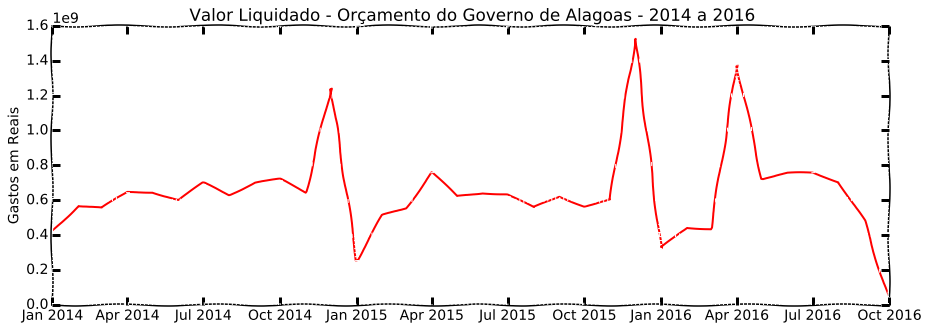

In [45]:
# Analisando graficamente a série histórica de gastos

fig = plt.figure(figsize=(15, 5), dpi=100, facecolor='w', edgecolor='w')
plt.plot(orcamento['data'], orcamento['valor_liquidado'], 'r')

plt.title('Valor Liquidado - Orçamento do Governo de Alagoas - 2014 a 2016')
plt.ylabel('Gastos em Reais')
plt.grid()

In [48]:
# Cálculo da média dos dados apresentados no gráfico
orcamento['valor_liquidado'].mean()

645806565.3220588

O gráfico parece estar coerente mas os valores são pouco intuitivos para nós. Para facilitar as análises, podemos colocar os gastos em milhões de reais ao invés de reais. Apesar de pouca coisa, o gráfico (e análises posteriores) podem ser muito mais intuitivas de serem analisadas.

A média dos valores do gráfico apresentada é 645806565,3220588 reais, como apresmbém é possível dizer que a média é igual a 645 milhões. Qual número você consegue interpretar de forma mais fácil?

In [49]:
# Passando o dado de reais para milhões de reais

colunas = ['valor_inicial', 'valor_empenhado', 'valor_atualizado', 'valor_liquidado', 'valor_pago']

for coluna in colunas:
    valor_em_milhoes = []
    for item, linha in orcamento.iterrows():
        valor_em_milhoes.append(linha[coluna]/10**6)
    nome_variavel = '{}_milhoes'.format(coluna)
    variavel = pd.Series(valor_em_milhoes)
    orcamento[nome_variavel] = variavel.values
    
rcamento.head()

,ano,mes,valor_inicial,valor_empenhado,valor_atualizado,valor_liquidado,valor_pago,data,valor_inicial_milhoes,valor_empenhado_milhoes,valor_atualizado_milhoes,valor_liquidado_milhoes,valor_pago_milhoes
0,2014,1,8.307204e+09,1.895801e+09,8.306779e+09,4.265501e+08,3.566138e+08,2014-01-01,8307.204125,1895.801035,8306.778709,426.550071,356.613833
1,2014,2,0.000000e+00,5.282538e+08,5.454010e+06,5.689762e+08,5.006719e+08,2014-02-01,0.000000,528.253784,5.454010,568.976170,500.671920
2,2014,3,0.000000e+00,5.071684e+08,7.939307e+07,5.535375e+08,5.926600e+08,2014-03-01,0.000000,507.168356,79.393074,553.537453,592.659989
3,2014,4,0.000000e+00,5.823151e+08,8.705740e+07,6.459481e+08,6.497749e+08,2014-04-01,0.000000,582.315147,87.057396,645.948137,649.774877
4,2014,5,0.000000e+00,5.518805e+08,8.346633e+07,6.482573e+08,6.233868e+08,2014-05-01,0.000000,551.880541,83.466329,648.257298,623.386764


In [50]:
# Removendo os dados que não estão em milhões
colunas = ['valor_inicial', 'valor_empenhado', 'valor_atualizado', 'valor_liquidado', 'valor_pago']

orcamento.drop(colunas, inplace=True, axis=1)

orcamento.head()

,ano,mes,data,valor_inicial_milhoes,valor_empenhado_milhoes,valor_atualizado_milhoes,valor_liquidado_milhoes,valor_pago_milhoes
0,2014,1,2014-01-01,8307.204125,1895.801035,8306.778709,426.550071,356.613833
1,2014,2,2014-02-01,0.000000,528.253784,5.454010,568.976170,500.671920
2,2014,3,2014-03-01,0.000000,507.168356,79.393074,553.537453,592.659989
3,2014,4,2014-04-01,0.000000,582.315147,87.057396,645.948137,649.774877
4,2014,5,2014-05-01,0.000000,551.880541,83.466329,648.257298,623.386764


# Análises Univariadas Não Gráficas

Análises univariadas de variáveis quantitativas são formas preliminares de avaliar a distribuição da população.
Podemos dividir as análises não gráficas em 3 tipos:

1) **Tendências centrais** - busca encontrar o centro da distribuição (média, mediana e moda).
    Obs: Ao se trabalhar com muitos outliers, mediana é mais aconselhável que a média
    
2) **Amplitude (spread)** - indica quão longe do ponto central ainda será possível encontrar dados (variância, desvio padrão range de interquartil).

3) **Assimetria e kurtose** - diferenças em relação à curva feita pelos dados


In [56]:
# Média e Mediana
liquidado_media = orcamento['valor_liquidado_milhoes'].mean()
liquidado_mediana = orcamento['valor_liquidado_milhoes'].median()

# Variância e Desvio Padrão
liquidado_variancia = orcamento['valor_liquidado_milhoes'].var()
liquidado_desvio_padrao = orcamento['valor_liquidado_milhoes'].std()

# Calculo dos quartis
qs, bins= pd.qcut(orcamento['valor_liquidado_milhoes'], [.25, .5, .75], retbins=True)
liquidado_quartil25 = bins[0]
liquidado_quartil50 = bins[1]
liquidado_quartil75 = bins[2]
liquidado_range_interquartil = liquidado_quartil75 - liquidado_quartil25

print('Análises Não Gráficas - Valores Liquidados')
print('')
print('Média do Valor Liquidado: {}'.format(round(liquidado_media, 2)))
print('Mediana do Valor Liquidado: {}'.format(round(liquidado_mediana, 2)))
print('')
print('Variância do Valor Liquidado: {}'.format(round(liquidado_variancia, 2)))
print('Desvio Padrão do Valor Liquidado: {}'.format(round(liquidado_desvio_padrao, 2)))
print('Range Interquartil do Valor Liquidado: {}'.format(round(liquidado_range_interquartil, 2)))

Análises Não Gráficas - Valores Liquidados

Média do Valor Liquidado: 645.81
Mediana do Valor Liquidado: 626.91

Variância do Valor Liquidado: 78207.9
Desvio Padrão do Valor Liquidado: 279.66
Range Interquartil do Valor Liquidado: 151.91


/home/leportella/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


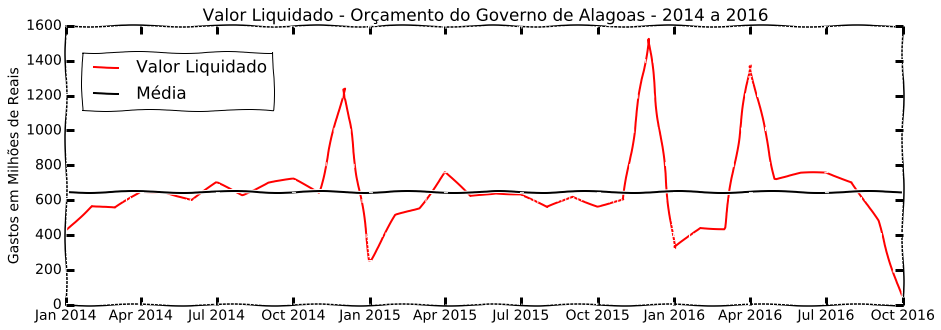

In [65]:
# Analisando graficamente a série histórica de gastos

fig = plt.figure(figsize=(15, 5), dpi=100, facecolor='w', edgecolor='w')
plt.plot(orcamento['data'], orcamento['valor_liquidado_milhoes'], 'r')

vetor_media = np.linspace(liquidado_media, liquidado_media, len(orcamento['valor_atualizado_milhoes']))
plt.plot(orcamento['data'], vetor_media, 'k')

plt.title('Valor Liquidado - Orçamento do Governo de Alagoas - 2014 a 2016')
plt.ylabel('Gastos em Milhões de Reais')
plt.legend(['Valor Liquidado', 'Média'], loc=(0.02, 0.7))
plt.grid()

/home/leportella/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


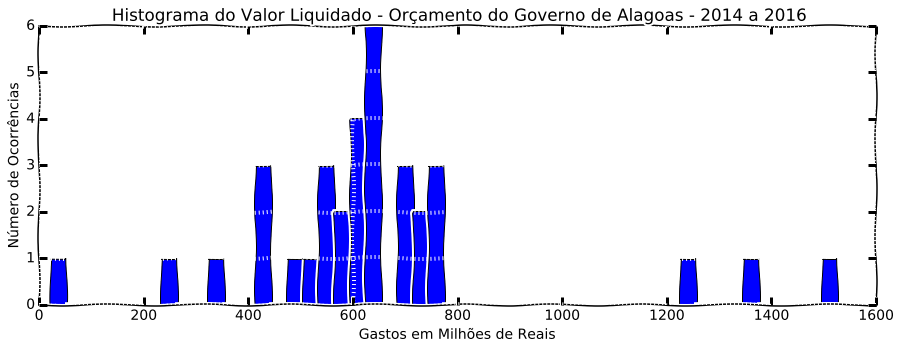

In [66]:
fig = plt.figure(figsize=(15, 5), dpi=100, facecolor='w', edgecolor='w')
hist = plt.hist(orcamento['valor_liquidado_milhoes'], bins=50)

plt.title('Histograma do Valor Liquidado - Orçamento do Governo de Alagoas - 2014 a 2016')
plt.xlabel('Gastos em Milhões de Reais')
plt.ylabel('Número de Ocorrências')
plt.grid()

/home/leportella/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


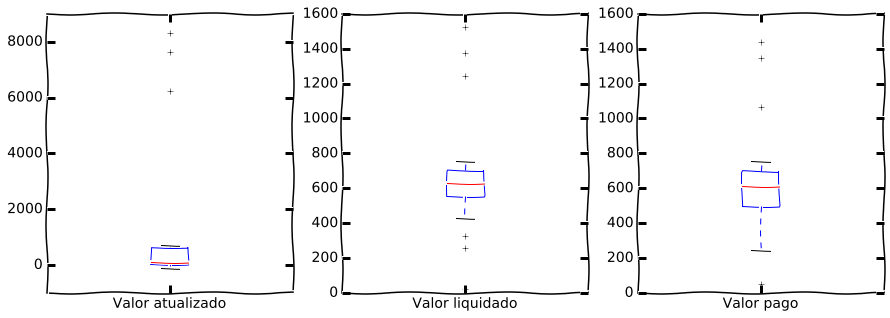

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=100, facecolor='w', edgecolor='w')

boxplot1 = axes[0].boxplot(orcamento['valor_atualizado_milhoes'], vert=True, labels=['Valor atualizado'])
boxplot2 = axes[1].boxplot(orcamento['valor_liquidado_milhoes'], vert=True, labels=['Valor liquidado'])
boxplot3 = axes[2].boxplot(orcamento['valor_pago_milhoes'], vert=True, labels=['Valor pago'])

## Referências

Behrens, J. T.. Principles and procedures of Exploratory Data Analysis. American Psychological Association Inc. 1997. Vol.2, No.2, 131-160


Nist; Exploratory Data Analsysis. Acess: 2017. Available in: http://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm

Seltman, H.; Experimental Design and Analysis. 2015. Available in: http://www.stat.cmu.edu/~hseltman/309/Book/

Tukey, J. Exploratory Data Analysis. 1977.